In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.7/881.7 kB 40.5 MB/s eta 0:00:00


In [1]:
import nltk
nltk.download('punkt')
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\harih\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\harih\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import cv2
from ultralytics import YOLO

In [22]:
import nltk

In [23]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\harih\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [3]:
from tkinter import Tk
from tkinter.filedialog import askopenfilename

In [4]:
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]
    return filtered_tokens

In [5]:
# Define model loading function (flexible for different models)
def load_model(model_path):
    """Loads the specified object detection model.

    Args:
        model_path (str): Path to the pre-trained model weights.

    Returns:
        object: Loaded object detection model object (replace with your model's logic)
    """
    # Load the YOLOv8 model from the specified path
    model = YOLO(model_path)
    return model  # Return the loaded YOLO model

In [6]:
# Function to detect damage and extract labels
def detect_damage(image_path, model):
    """Performs object detection and extracts labels from an image.

    Args:
        image_path (str): Path to the image.
        model (object): Loaded object detection model object.

    Returns:
        list, None: List of detected labels (if successful), None otherwise.
    """

    try:
        # Load the image
        img = cv2.imread(image_path)
        if img is None:
            raise FileNotFoundError(f"Image not found or unable to load: {image_path}")

        # Perform inference using the YOLO model
        results = model.predict(img)

        # Extract detected labels (modify based on your model's output structure)
        # Access the 'names' attribute of the model to get class labels
        labels = [model.names[int(result.boxes.cls[i])] for result in results for i in range(len(result.boxes.cls))] if results else None
        return labels

    except Exception as e:
        print(f"An error occurred: {e}")
        return None  # Indicate error

In [7]:
# Function to match description and labels with confidence
def match_labels_nlp(detected_labels, user_description):
    if detected_labels is None:
        return "Error: Label extraction failed."
    elif not detected_labels:
        return "No damage detected."
    else:
        # Preprocess user description and labels
        user_description_tokens = preprocess_text(user_description)
        label_tokens = [preprocess_text(label) for label in detected_labels]

        # Calculate exact match score (already implemented)
        exact_match_score = 1 if user_description.lower() in [label.lower() for label in detected_labels] else 0

        # Calculate word overlap score
        word_overlap_score = sum(len(set(user_description_tokens).intersection(label_tokens)) for label_tokens in label_tokens)

        # Combine scores and determine confidence level (adjust weights based on your needs)
        confidence = 0.7 * exact_match_score + 0.3 * word_overlap_score 

        if confidence >= 0.5:
            return "Match: Detected damage aligns with your description."
        elif confidence >= 0.3:
            return "Suspicious: Detected damage might not perfectly match your description, but there's some similarity."
        else:
            return "Uncertain: Detected labels (%s) don't seem to match your description (%s)." % (", ".join(detected_labels), user_description)


In [8]:
# Function to upload the image from your local machine
def upload_image():
    # Use Tkinter to open a file dialog to select the image
    Tk().withdraw()  # Hides the Tkinter root window
    image_path = askopenfilename(title="Select an Image", filetypes=[("Image files", ".jpg;.png;*.jpeg")])
    return image_path

In [9]:
model_path = "model/best.pt"  # Replace with your model path
model = load_model(model_path)


In [20]:
#     # Upload image from local machine
# image_path = upload_image()

In [16]:
image_path = "headlight3.jfif.jpg"

In [19]:
from PIL import Image
import matplotlib.pyplot as plt

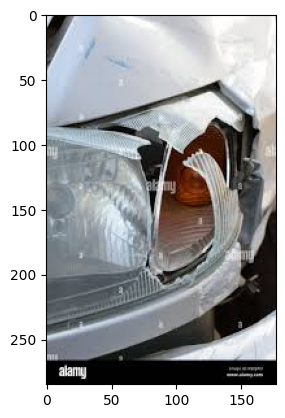

In [20]:
img = Image.open(image_path)
plt.imshow(img)

In [37]:
image_path = "image 12.jpg"

In [38]:


if image_path:
    detected_labels = detect_damage(image_path, model)
    user_description = input("Enter damage description: ")
    match_message = match_labels_nlp(detected_labels, user_description)
    print(match_message)
else:
    print("No image selected.")

0: 480x640 3 dents, 1 scratch, 305.3ms
Speed: 12.0ms preprocess, 305.3ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)
Match: Detected damage aligns with your description.


In [6]:
model.save("nlp.py")